In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [3]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    return AL, caches

In [4]:
def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    cache = (linear_cache, activation_cache)
    
    return A, cache

In [5]:
def linear_forward(A, W, b):
    Z = W.dot(A) + b
    cache = (A, W, b) 
    
    return Z, cache

In [6]:
def relu(Z):
    A = np.maximum(0,Z)    
    cache = Z 
    
    return A, cache

In [7]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

In [8]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    #cost = (1/2) * np.sum(np.power(AL - Y, 2))
    cost = np.squeeze(cost)
    
    return cost

In [9]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [10]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [11]:
def sigmoid_backward(dA, cache):
    Z = cache    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    return dZ

In [12]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev, dW, db

In [13]:
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    dZ[Z <= 0] = 0    
    
    return dZ

In [14]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

In [15]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):
        AL, caches =  L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 10000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 10000 == 0:
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [16]:
input = 4

if input==2:
    train_x = np.array([[1, -1, -1], 
                        [1,  1, -1], 
                        [1, -1,  1], 
                        [1,  1,  1]]).T
    train_y = np.array([[0], 
                        [1], 
                        [1], 
                        [0]]).T
elif input==4:
    train_x = np.array([[1, -1, -1, -1, -1],
                        [1, -1, -1, -1,  1],
                        [1, -1, -1,  1, -1],
                        [1, -1, -1,  1,  1],
                        [1, -1,  1, -1, -1],
                        [1, -1,  1, -1,  1],
                        [1, -1,  1,  1, -1],
                        [1, -1,  1,  1,  1],              
                        [1,  1, -1, -1, -1],
                        [1,  1, -1, -1,  1],
                        [1,  1, -1,  1, -1],
                        [1,  1, -1,  1,  1],
                        [1,  1,  1, -1, -1],
                        [1,  1,  1, -1,  1],
                        [1,  1,  1,  1, -1],
                        [1,  1,  1,  1,  1]]).T

    train_y = np.array([[0], 
                        [1], 
                        [1], 
                        [0], 
                        [1], 
                        [0], 
                        [0], 
                        [1], 
                        [1], 
                        [0], 
                        [0], 
                        [1], 
                        [0], 
                        [1], 
                        [1], 
                        [0]]).T


print(train_x.shape)
print(train_y.shape)

(5, 16)
(1, 16)


Cost after iteration 0: 0.693569
Cost after iteration 10000: 0.685190
Cost after iteration 20000: 0.594545
Cost after iteration 30000: 0.392641
Cost after iteration 40000: 0.238824
Cost after iteration 50000: 0.024755
Cost after iteration 60000: 0.010433
Cost after iteration 70000: 0.006375
Cost after iteration 80000: 0.004454
Cost after iteration 90000: 0.003359


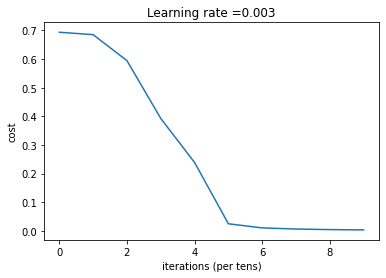

In [17]:
layers_dims = [train_x.shape[0], 4, 4, 4, 1]
parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.003, num_iterations = 100000, print_cost = True)

In [18]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    probas, caches = L_model_forward(X, parameters)
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    print("predictions: " + str(p))
    print("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [19]:
pred_train = predict(train_x, train_y, parameters)

predictions: [[0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0.]]
true labels: [[0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0]]
Accuracy: 1.0
